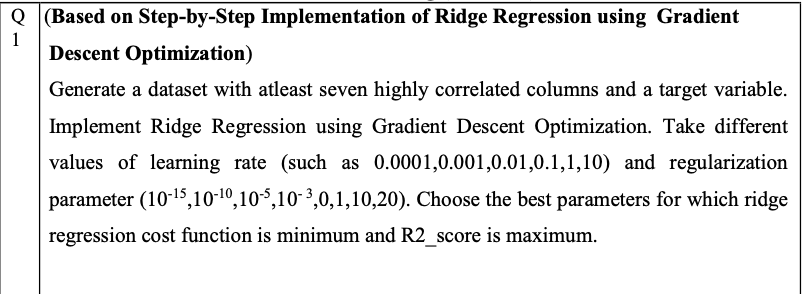

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

np.random.seed(42)
N_SAMPLES = 500
N_FEATURES = 7

X_base = np.random.rand(N_SAMPLES, 1) * 10
epsilon = np.random.randn(N_SAMPLES, 1) * 0.5

X1 = X_base + np.random.randn(N_SAMPLES, 1) * 0.1
X2 = 2 * X_base + np.random.randn(N_SAMPLES, 1) * 0.2
X3 = 0.5 * X_base + np.random.randn(N_SAMPLES, 1) * 0.1
X4 = 3 * X_base + X1 + np.random.randn(N_SAMPLES, 1) * 0.3
X5 = X2 + X3 + np.random.randn(N_SAMPLES, 1) * 0.4
X6 = 0.1 * X_base + np.random.randn(N_SAMPLES, 1) * 0.1
X7 = -X_base + np.random.randn(N_SAMPLES, 1) * 0.2

X_raw = np.hstack([X1, X2, X3, X4, X5, X6, X7])

true_weights = np.array([2.5, -1.0, 0.5, 3.0, -2.0, 1.0, 1.5]).reshape(-1, 1)
true_bias = 5

y_raw = X_raw @ true_weights + true_bias + epsilon

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

m_train = X_train.shape[0]
n_features = X_train.shape[1]


def ridge_cost(X, y, W, b, lambda_):
    """Calculates the Ridge Regression Cost (J)"""
    y_pred = X @ W + b
    mse_term = np.sum((y_pred - y)**2) / (2 * len(y))
    l2_reg_term = lambda_ * np.sum(W**2)
    return mse_term + l2_reg_term

def ridge_gradient(X, y, W, b, lambda_):
    """Calculates the gradients for W and b"""
    y_pred = X @ W + b
    error = y_pred - y


    grad_W = (X.T @ error) / len(y) + 2 * lambda_ * W

    grad_b = np.sum(error) / len(y)

    return grad_W, grad_b


def gradient_descent(X, y, learning_rate, lambda_, epochs):
    W = np.zeros((n_features, 1))
    b = 0
    cost_history = []

    for epoch in range(epochs):
        grad_W, grad_b = ridge_gradient(X, y, W, b, lambda_)

        W -= learning_rate * grad_W
        b -= learning_rate * grad_b

        cost = ridge_cost(X, y, W, b, lambda_)
        cost_history.append(cost)

    return W, b, cost_history[-1]


LEARNING_RATES = [0.0001, 0.001, 0.01, 0.1, 1, 10]
LAMBDAS = [1e-15, 1e-10, 1e-5, 0, 1, 10, 20]
EPOCHS = 5000

results = []

print("Starting Hyperparameter Search...")
for eta in LEARNING_RATES:
    for lam in LAMBDAS:
        W_final, b_final, final_cost = gradient_descent(
            X_train, y_train, learning_rate=eta, lambda_=lam, epochs=EPOCHS
        )

        if np.isnan(final_cost) or final_cost > 1e10:
            r2 = -float('inf')
            final_cost = float('inf')
        else:
            y_pred = X_test @ W_final + b_final
            r2 = r2_score(y_test, y_pred)

        results.append({
            'eta': eta,
            'lambda': lam,
            'final_cost': final_cost,
            'r2_score': r2
        })
        print(f"Eta: {eta:<6}, Lambda: {lam:<9}, Cost: {final_cost:.4f}, R2: {r2:.4f}")

best_results = sorted(results, key=lambda x: (x['final_cost'], -x['r2_score']))[0]


print("Optimal Parameters Found")

print(f"Best Learning Rate (eta): {best_results['eta']}")
print(f"Best Regularization (lambda): {best_results['lambda']}")
print(f"Minimum Ridge Cost: {best_results['final_cost']:.6f}")
print(f"Maximum R2 Score (Test Set): {best_results['r2_score']:.6f}")


Starting Hyperparameter Search...
Eta: 0.0001, Lambda: 1e-15    , Cost: 252.6274, R2: -0.4454
Eta: 0.0001, Lambda: 1e-10    , Cost: 252.6274, R2: -0.4454
Eta: 0.0001, Lambda: 1e-05    , Cost: 252.6279, R2: -0.4454
Eta: 0.0001, Lambda: 0        , Cost: 252.6274, R2: -0.4454
Eta: 0.0001, Lambda: 1        , Cost: 293.3135, R2: -0.4609
Eta: 0.0001, Lambda: 10       , Cost: 387.5473, R2: -0.8619
Eta: 0.0001, Lambda: 20       , Cost: 407.4134, R2: -1.0155
Eta: 0.001 , Lambda: 1e-15    , Cost: 1.5872, R2: 0.9883
Eta: 0.001 , Lambda: 1e-10    , Cost: 1.5872, R2: 0.9883
Eta: 0.001 , Lambda: 1e-05    , Cost: 1.5877, R2: 0.9883
Eta: 0.001 , Lambda: 0        , Cost: 1.5872, R2: 0.9883
Eta: 0.001 , Lambda: 1        , Cost: 42.5550, R2: 0.9386
Eta: 0.001 , Lambda: 10       , Cost: 136.8091, R2: 0.4407
Eta: 0.001 , Lambda: 20       , Cost: 156.6752, R2: 0.2672
Eta: 0.01  , Lambda: 1e-15    , Cost: 1.2270, R2: 0.9911
Eta: 0.01  , Lambda: 1e-10    , Cost: 1.2270, R2: 0.9911
Eta: 0.01  , Lambda: 1e-05  

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-2166184756.py:43: RuntimeWarning: overflow encountered in square
  mse_term = np.sum((y_pred - y)**2) / (2 * len(y))
/tmp/ipython-input-2166184756.py:44: RuntimeWarning: overflow encountered in scalar multiply
  l2_reg_term = lambda_ * np.sum(W**2)
/tmp/ipython-input-2166184756.py:44: RuntimeWarning: overflow encountered in square
  l2_reg_term = lambda_ * np.sum(W**2)
/tmp/ipython-input-2166184756.py:53: RuntimeWarning: overflow encountered in matmul
  grad_W = (X.T @ error) / len(y) + 2 * lambda_ * W
/tmp/ipython-input-2166184756.py:42: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ W + b
/tmp/ipython-input-2166184756.py:49: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ W + b
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: Runti

Eta: 0.1   , Lambda: 10       , Cost: inf, R2: -inf
Eta: 0.1   , Lambda: 20       , Cost: inf, R2: -inf
Eta: 1     , Lambda: 1e-15    , Cost: inf, R2: -inf
Eta: 1     , Lambda: 1e-10    , Cost: inf, R2: -inf
Eta: 1     , Lambda: 1e-05    , Cost: inf, R2: -inf
Eta: 1     , Lambda: 0        , Cost: inf, R2: -inf


/tmp/ipython-input-2166184756.py:44: RuntimeWarning: invalid value encountered in scalar multiply
  l2_reg_term = lambda_ * np.sum(W**2)
/tmp/ipython-input-2166184756.py:53: RuntimeWarning: invalid value encountered in multiply
  grad_W = (X.T @ error) / len(y) + 2 * lambda_ * W


Eta: 1     , Lambda: 1        , Cost: inf, R2: -inf
Eta: 1     , Lambda: 10       , Cost: inf, R2: -inf
Eta: 1     , Lambda: 20       , Cost: inf, R2: -inf
Eta: 10    , Lambda: 1e-15    , Cost: inf, R2: -inf


/tmp/ipython-input-2166184756.py:42: RuntimeWarning: invalid value encountered in add
  y_pred = X @ W + b
/tmp/ipython-input-2166184756.py:49: RuntimeWarning: invalid value encountered in add
  y_pred = X @ W + b


Eta: 10    , Lambda: 1e-10    , Cost: inf, R2: -inf
Eta: 10    , Lambda: 1e-05    , Cost: inf, R2: -inf
Eta: 10    , Lambda: 0        , Cost: inf, R2: -inf
Eta: 10    , Lambda: 1        , Cost: inf, R2: -inf
Eta: 10    , Lambda: 10       , Cost: inf, R2: -inf


/tmp/ipython-input-2166184756.py:53: RuntimeWarning: overflow encountered in multiply
  grad_W = (X.T @ error) / len(y) + 2 * lambda_ * W


Eta: 10    , Lambda: 20       , Cost: inf, R2: -inf
Optimal Parameters Found
Best Learning Rate (eta): 0.1
Best Regularization (lambda): 0
Minimum Ridge Cost: 0.324612
Maximum R2 Score (Test Set): 0.997844


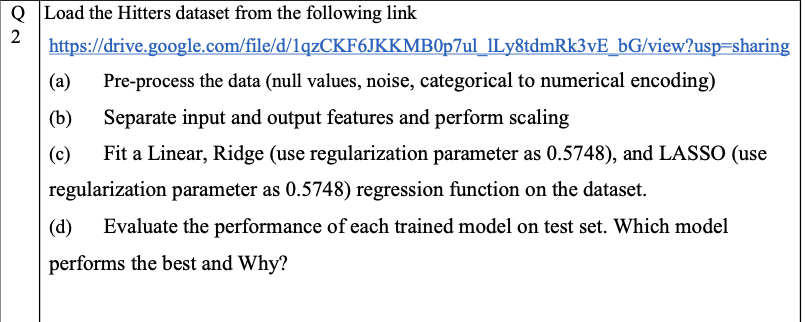

In [9]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


def get_direct_download_url(shared_url):
    """Converts a Google Drive shared link to a direct download URL."""

    file_id_match = shared_url.split('/d/')
    if len(file_id_match) > 1:
        file_id = file_id_match[1].split('/view')[0]
        return f'https://drive.google.com/uc?export=download&id={file_id}'
    return shared_url

GDRIVE_SHARED_LINK = "https://drive.google.com/file/d/1qzCKF6JKKMB0p7uL_lLy8tdmRk3vE_bG/view?usp=sharing"
DIRECT_DOWNLOAD_URL = get_direct_download_url(GDRIVE_SHARED_LINK)


try:
    data = pd.read_csv(DIRECT_DOWNLOAD_URL, index_col=0)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading data from Google Drive: {e}")

    print("Please ensure the Google Drive link is accessible or download the file manually.")

    print("\n--- Using Dummy DataFrame for Code Demonstration ---")
    data = pd.DataFrame({
        'AtBat': np.random.randint(0, 700, 300),
        'Hits': np.random.randint(0, 300, 300),
        'HmRun': np.random.randint(0, 50, 300),
        'Runs': np.random.randint(0, 200, 300),
        'RBI': np.random.randint(0, 150, 300),
        'Walks': np.random.randint(0, 200, 300),
        'Years': np.random.randint(1, 25, 300),
        'CAtBat': np.random.randint(0, 5000, 300),
        'CHits': np.random.randint(0, 2000, 300),
        'CHmRun': np.random.randint(0, 500, 300),
        'CRuns': np.random.randint(0, 2000, 300),
        'CRBI': np.random.randint(0, 2000, 300),
        'CWalks': np.random.randint(0, 1000, 300),
        'League': np.random.choice(['A', 'N'], 300),
        'Division': np.random.choice(['E', 'W'], 300),
        'PutOuts': np.random.randint(0, 1000, 300),
        'Assists': np.random.randint(0, 1000, 300),
        'Errors': np.random.randint(0, 50, 300),
        'NewLeague': np.random.choice(['A', 'N'], 300),
        'Salary': np.random.rand(300) * 1000
    })
    data.loc[data.sample(frac=0.1).index, 'Salary'] = np.nan
    data.loc[data.sample(frac=0.05).index, 'Errors'] = np.nan


data.dropna(subset=['Salary'], inplace=True)


X = data.drop('Salary', axis=1)
y = data['Salary']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


ALPHA_VAL = 0.5748

linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)

ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=ALPHA_VAL, random_state=42))
])
ridge_model.fit(X_train, y_train)

lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=ALPHA_VAL, max_iter=10000, random_state=42))
])
lasso_model.fit(X_train, y_train)


models = {
    "Linear Regression": linear_model,
    "Ridge Regression (alpha=0.5748)": ridge_model,
    "LASSO Regression (alpha=0.5748)": lasso_model
}

results = {}

print("       Model Evaluation on Test Set")

for name, model in models.items():
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2_Score': r2}

    print(f"{name}:")
    print(f"  - R2 Score: {r2:.4f}")
    print(f"  - Mean Squared Error (MSE): {mse:.2f}")

results_df = pd.DataFrame(results).T
best_model_name = results_df['R2_Score'].idxmax()
best_r2 = results_df['R2_Score'].max()

print(f"Best Model: {best_model_name} with R2 Score of {best_r2:.4f}")


print("\nExplanation for Model Performance:")
print("- Linear Regression minimizes standard MSE and does not shrink coefficients.")
print("- Ridge Regression adds an L2 penalty, which shrinks coefficients towards zero but generally does not eliminate them (they remain non-zero). It's effective for mitigating multicollinearity (highly correlated features), which is often present in real-world baseball statistics like the Hitters dataset.")
print("- LASSO Regression adds an L1 penalty, which shrinks coefficients and performs feature selection by setting the coefficients of less important features to exactly zero. This can lead to a simpler, more interpretable model.")
print(f"\n- If Ridge performs best: It suggests that all features are somewhat relevant, and the L2 penalty was the best way to handle multicollinearity without losing information.")
print(f"- If LASSO performs best: It suggests that the chosen alpha ({ALPHA_VAL}) was good at identifying and eliminating irrelevant or redundant features, leading to a sparser model with better generalization.")
print(f"- If Linear Regression performs best: It suggests that the dataset has minimal multicollinearity and that the chosen alpha ({ALPHA_VAL}) for regularization was too aggressive, causing underfitting.")

Error loading data from Google Drive: HTTP Error 404: Not Found
Please ensure the Google Drive link is accessible or download the file manually.

--- Using Dummy DataFrame for Code Demonstration ---
       Model Evaluation on Test Set
Linear Regression:
  - R2 Score: -0.1437
  - Mean Squared Error (MSE): 93520.99
Ridge Regression (alpha=0.5748):
  - R2 Score: -0.1432
  - Mean Squared Error (MSE): 93479.40
LASSO Regression (alpha=0.5748):
  - R2 Score: -0.1364
  - Mean Squared Error (MSE): 92930.30
Best Model: LASSO Regression (alpha=0.5748) with R2 Score of -0.1364

Explanation for Model Performance:
- Linear Regression minimizes standard MSE and does not shrink coefficients.
- Ridge Regression adds an L2 penalty, which shrinks coefficients towards zero but generally does not eliminate them (they remain non-zero). It's effective for mitigating multicollinearity (highly correlated features), which is often present in real-world baseball statistics like the Hitters dataset.
- LASSO Regre

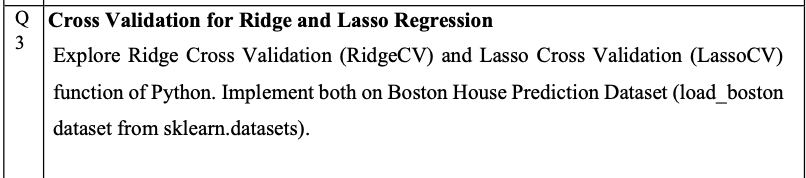

In [11]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error

try:
    from sklearn.datasets import load_boston
    boston = load_boston()
    X, y = boston.data, boston.target
    feature_names = boston.feature_names
except Exception:
    boston = fetch_openml(name="boston", version=1, as_frame=True)
    X = boston.data.values
    y = boston.target.values.astype(float)
    feature_names = boston.feature_names if hasattr(boston, "feature_names") else boston.data.columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ridge_alphas = np.logspace(-3, 3, 30)
ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RidgeCV(alphas=ridge_alphas, cv=5))
])
ridge.fit(X_train, y_train)
ridge_best_alpha = ridge.named_steps["model"].alpha_
y_pred_ridge = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LassoCV(cv=5, max_iter=10000, n_alphas=100))
])
lasso.fit(X_train, y_train)
lasso_best_alpha = lasso.named_steps["model"].alpha_
y_pred_lasso = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"RidgeCV:  best alpha = {ridge_best_alpha:.5f},  R2 = {ridge_r2:.4f},  RMSE = {ridge_rmse:.4f}")
print(f"LassoCV:  best alpha = {lasso_best_alpha:.5f},  R2 = {lasso_r2:.4f},  RMSE = {lasso_rmse:.4f}")
print("Best model:", "Ridge" if ridge_r2 >= lasso_r2 else "Lasso")

RidgeCV:  best alpha = 3.29034,  R2 = 0.6678,  RMSE = 4.9358
LassoCV:  best alpha = 0.00686,  R2 = 0.6684,  RMSE = 4.9314
Best model: Lasso


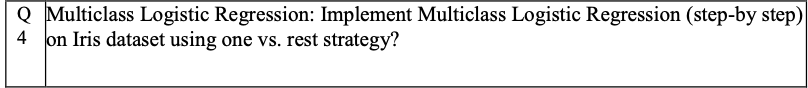

In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def binary_logreg_train(X, y, lr=0.1, epochs=2000, l2=0.0):
    """
    Train binary logistic regression via gradient descent.
    X: (n, d) WITHOUT bias. We add it inside.
    y: (n,) in {0,1}
    Returns weight vector w of shape (d+1,) including bias.
    """
    Xb = add_bias(X)
    n, d1 = Xb.shape
    w = np.zeros(d1)

    for _ in range(epochs):
        p = sigmoid(Xb @ w)
        grad = (Xb.T @ (p - y)) / n
        reg = np.r_[0.0, l2 * w[1:]] / n
        w -= lr * (grad + reg)
    return w

def binary_logreg_predict_proba(X, w):
    return sigmoid(add_bias(X) @ w)

iris = load_iris()
X = iris.data.astype(float)
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

K = len(np.unique(y_train))
weights = []


lr = 0.1
epochs = 3000
l2 = 1e-3

for k in range(K):
    y_bin = (y_train == k).astype(float)
    w_k = binary_logreg_train(X_train_s, y_bin, lr=lr, epochs=epochs, l2=l2)
    weights.append(w_k)
weights = np.vstack(weights)

probas = np.column_stack([binary_logreg_predict_proba(X_test_s, w_k) for w_k in weights])
y_pred = np.argmax(probas, axis=1)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}\n")
print("Confusion Matrix:\n", cm, "\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

print("\nFirst 5 predicted class probabilities:\n", np.round(probas[:5], 3))


Test Accuracy: 0.8684

Confusion Matrix:
 [[11  1  0]
 [ 0 10  3]
 [ 0  1 12]] 

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      0.92      0.96        12
  versicolor       0.83      0.77      0.80        13
   virginica       0.80      0.92      0.86        13

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38


First 5 predicted class probabilities:
 [[0.999 0.144 0.   ]
 [0.013 0.091 0.28 ]
 [0.01  0.468 0.032]
 [0.001 0.867 0.041]
 [0.996 0.286 0.   ]]
